In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Pandas Config
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [69]:
def reverse_ohe(df, features, ignoredFeatures, featuresLength, prefix, suffix = ''):
    all_features = ignoredFeatures + features
    df_pivot = pd.DataFrame(columns = all_features)

    for i in range(featuresLength):
        cols_aux = [f'{feature}{prefix}{i}{suffix}' for feature in features]
        df_aux = df[ignoredFeatures + cols_aux].copy()
        df_aux.columns = all_features
        df_pivot = pd.concat([df_pivot, df_aux])

    return df_pivot.sort_values(by='Data_Hora').copy()

In [70]:
merged = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                sep=';',
                dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

merged.head()

,index,Data,Hora,Data_Hora,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,VelocidadeDoVento_0,Precipitacao_0,Local_0,UmidadeRelativa_1,PressaoAtmosferica_1,TemperaturaDoAr_1,TemperaturaInterna_1,PontoDeOrvalho_1,SensacaoTermica_1,RadiacaoSolar_1,DirecaoDoVento_1,VelocidadeDoVento_1,Precipitacao_1,Local_1,UmidadeRelativa_2,PressaoAtmosferica_2,TemperaturaDoAr_2,TemperaturaInterna_2,PontoDeOrvalho_2,SensacaoTermica_2,RadiacaoSolar_2,DirecaoDoVento_2,VelocidadeDoVento_2,Precipitacao_2,Local_2,UmidadeRelativa_3,PressaoAtmosferica_3,TemperaturaDoAr_3,TemperaturaInterna_3,PontoDeOrvalho_3,SensacaoTermica_3,RadiacaoSolar_3,DirecaoDoVento_3,VelocidadeDoVento_3,Precipitacao_3,Local_3,UmidadeRelativa_4,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,26,01/01/11,06:30:00,2011-01-01 06:30:00,87.2,918.6,19.5,22.6,17.3,NaN,8.0,163.0,1.1,0.0,Camilopolis,89.2,918.7,19.1,22.6,17.3,NaN,9.0,109.0,2.7,0.0,Erasmo,89.4,917.2,19.1,22.5,17.3,NaN,8.0,113.0,2.8,0.0,Paraiso,86.5,924.8,19.7,23.2,17.4,NaN,8.0,149.0,1.2,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
1,27,01/01/11,06:45:00,2011-01-01 06:45:00,86.6,918.7,19.5,22.5,17.2,NaN,18.0,160.0,1.4,0.0,Camilopolis,88.6,918.7,19.2,22.6,17.3,NaN,16.0,127.0,2.0,0.0,Erasmo,89.1,917.2,19.1,22.5,17.3,NaN,16.0,154.0,1.6,0.0,Paraiso,85.6,924.8,19.9,23.3,17.4,NaN,16.0,162.0,1.8,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
2,28,01/01/11,07:00:00,2011-01-01 07:00:00,86.0,918.7,19.6,22.6,17.2,NaN,41.0,108.0,2.2,0.0,Camilopolis,88.1,918.7,19.3,22.7,17.3,NaN,35.0,138.0,2.7,0.0,Erasmo,88.4,917.2,19.1,22.6,17.3,NaN,28.0,116.0,2.3,0.0,Paraiso,85.6,924.8,19.9,23.3,17.4,NaN,30.0,181.0,1.7,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
3,29,01/01/11,07:15:00,2011-01-01 07:15:00,85.4,918.7,19.7,22.6,17.2,NaN,62.0,125.0,2.3,0.0,Camilopolis,88.1,918.7,19.3,22.7,17.3,NaN,50.0,135.0,1.4,0.0,Erasmo,89.3,917.3,19.0,22.7,17.2,NaN,50.0,128.0,2.5,0.0,Paraiso,84.4,924.9,20.0,23.3,17.2,NaN,53.0,151.0,1.5,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
4,30,01/01/11,07:30:00,2011-01-01 07:30:00,84.7,918.8,19.8,22.7,17.1,NaN,82.0,146.0,1.8,0.0,Camilopolis,87.4,918.7,19.4,22.8,17.2,NaN,88.0,139.0,3.7,0.0,Erasmo,88.6,917.3,19.0,22.7,17.1,NaN,77.0,120.0,1.6,0.0,Paraiso,84.2,924.9,19.8,23.4,17.1,NaN,66.0,176.0,3.0,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria


In [71]:
merged[['Precipitacao_0', 'Precipitacao_1', 'Precipitacao_2', 'Precipitacao_3', 'Precipitacao_4']].corr()

,Precipitacao_0,Precipitacao_1,Precipitacao_2,Precipitacao_3,Precipitacao_4
Precipitacao_0,1.000000,0.506489,0.476399,0.494459,0.503100
Precipitacao_1,0.506489,1.000000,0.354365,0.364162,0.394172
Precipitacao_2,0.476399,0.354365,1.000000,0.583411,0.612899
Precipitacao_3,0.494459,0.364162,0.583411,1.000000,0.538128
Precipitacao_4,0.503100,0.394172,0.612899,0.538128,1.000000


In [72]:
regions = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/error_regions.csv', sep=';')

regions.head()

,Data_Hora,UmidadeRelativa_0_error,UmidadeRelativa_1_error,UmidadeRelativa_2_error,UmidadeRelativa_3_error,UmidadeRelativa_4_error,PressaoAtmosferica_0_error,PressaoAtmosferica_1_error,PressaoAtmosferica_2_error,PressaoAtmosferica_3_error,PressaoAtmosferica_4_error,TemperaturaDoAr_0_error,TemperaturaDoAr_1_error,TemperaturaDoAr_2_error,TemperaturaDoAr_3_error,TemperaturaDoAr_4_error,TemperaturaInterna_0_error,TemperaturaInterna_1_error,TemperaturaInterna_2_error,TemperaturaInterna_3_error,TemperaturaInterna_4_error,PontoDeOrvalho_0_error,PontoDeOrvalho_1_error,PontoDeOrvalho_2_error,PontoDeOrvalho_3_error,PontoDeOrvalho_4_error,SensacaoTermica_0_error,SensacaoTermica_1_error,SensacaoTermica_2_error,SensacaoTermica_3_error,SensacaoTermica_4_error,RadiacaoSolar_0_error,RadiacaoSolar_1_error,RadiacaoSolar_2_error,RadiacaoSolar_3_error,RadiacaoSolar_4_error,DirecaoDoVento_0_error,DirecaoDoVento_1_error,DirecaoDoVento_2_error,DirecaoDoVento_3_error,DirecaoDoVento_4_error,VelocidadeDoVento_0_error,VelocidadeDoVento_1_error,VelocidadeDoVento_2_error,VelocidadeDoVento_3_error,VelocidadeDoVento_4_error,Precipitacao_0_error,Precipitacao_1_error,Precipitacao_2_error,Precipitacao_3_error,Precipitacao_4_error
0,2011-01-01 00:00:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,2011-01-01 00:15:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2,2011-01-01 00:30:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,2011-01-01 00:45:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
4,2011-01-01 01:00:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False


In [73]:
df = merged.merge(regions, on = 'Data_Hora')

df.head()

,index,Data,Hora,Data_Hora,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,VelocidadeDoVento_0,Precipitacao_0,Local_0,UmidadeRelativa_1,PressaoAtmosferica_1,TemperaturaDoAr_1,TemperaturaInterna_1,PontoDeOrvalho_1,SensacaoTermica_1,RadiacaoSolar_1,DirecaoDoVento_1,VelocidadeDoVento_1,Precipitacao_1,Local_1,UmidadeRelativa_2,PressaoAtmosferica_2,TemperaturaDoAr_2,TemperaturaInterna_2,PontoDeOrvalho_2,SensacaoTermica_2,RadiacaoSolar_2,DirecaoDoVento_2,VelocidadeDoVento_2,Precipitacao_2,Local_2,UmidadeRelativa_3,PressaoAtmosferica_3,TemperaturaDoAr_3,TemperaturaInterna_3,PontoDeOrvalho_3,SensacaoTermica_3,RadiacaoSolar_3,DirecaoDoVento_3,VelocidadeDoVento_3,Precipitacao_3,Local_3,UmidadeRelativa_4,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4,UmidadeRelativa_0_error,UmidadeRelativa_1_error,UmidadeRelativa_2_error,UmidadeRelativa_3_error,UmidadeRelativa_4_error,PressaoAtmosferica_0_error,PressaoAtmosferica_1_error,PressaoAtmosferica_2_error,PressaoAtmosferica_3_error,PressaoAtmosferica_4_error,TemperaturaDoAr_0_error,TemperaturaDoAr_1_error,TemperaturaDoAr_2_error,TemperaturaDoAr_3_error,TemperaturaDoAr_4_error,TemperaturaInterna_0_error,TemperaturaInterna_1_error,TemperaturaInterna_2_error,TemperaturaInterna_3_error,TemperaturaInterna_4_error,PontoDeOrvalho_0_error,PontoDeOrvalho_1_error,PontoDeOrvalho_2_error,PontoDeOrvalho_3_error,PontoDeOrvalho_4_error,SensacaoTermica_0_error,SensacaoTermica_1_error,SensacaoTermica_2_error,SensacaoTermica_3_error,SensacaoTermica_4_error,RadiacaoSolar_0_error,RadiacaoSolar_1_error,RadiacaoSolar_2_error,RadiacaoSolar_3_error,RadiacaoSolar_4_error,DirecaoDoVento_0_error,DirecaoDoVento_1_error,DirecaoDoVento_2_error,DirecaoDoVento_3_error,DirecaoDoVento_4_error,VelocidadeDoVento_0_error,VelocidadeDoVento_1_error,VelocidadeDoVento_2_error,VelocidadeDoVento_3_error,VelocidadeDoVento_4_error,Precipitacao_0_error,Precipitacao_1_error,Precipitacao_2_error,Precipitacao_3_error,Precipitacao_4_error
0,26,01/01/11,06:30:00,2011-01-01 06:30:00,87.2,918.6,19.5,22.6,17.3,NaN,8.0,163.0,1.1,0.0,Camilopolis,89.2,918.7,19.1,22.6,17.3,NaN,9.0,109.0,2.7,0.0,Erasmo,89.4,917.2,19.1,22.5,17.3,NaN,8.0,113.0,2.8,0.0,Paraiso,86.5,924.8,19.7,23.2,17.4,NaN,8.0,149.0,1.2,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,27,01/01/11,06:45:00,2011-01-01 06:45:00,86.6,918.7,19.5,22.5,17.2,NaN,18.0,160.0,1.4,0.0,Camilopolis,88.6,918.7,19.2,22.6,17.3,NaN,16.0,127.0,2.0,0.0,Erasmo,89.1,917.2,19.1,22.5,17.3,NaN,16.0,154.0,1.6,0.0,Paraiso,85.6,924.8,19.9,23.3,17.4,NaN,16.0,162.0,1.8,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2,28,01/01/11,07:00:00,2011-01-01 07:00:00,86.0,918.7,19.6,22.6,17.2,NaN,41.0,108.0,2.2,0.0,Camilopolis,88.1,918.7,19.3,22.7,17.3,NaN,35.0,138.0,2.7,0.0,Erasmo,88.4,917.2,19.1,22.6,17.3,NaN,28.0,116.0,2.3,0.0,Paraiso,85.6,924.8,19.9,23.3,17.4,NaN,30.0,181.0,1.7,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,29,01/01/11,07:1

In [74]:
orders = pd.read_csv('../../../data/cleandata/Ordens de serviço/Enchentes_LatLong.csv', sep=';')

orders.head()

,ID1,ID2,Hora,Endereco1,Endereco2,Comentario1,Comentario2,Status,Data,lat,lng,status
0,NaN,003.578/2.010,19:53:42,AVN MAURICIO DE MEDEIROS - ASS. MARG. GUARARÁ...,JD IRENE,NaN,NaN,Encerrada,07/01/2010,-23.709969,-46.508143,0.0
1,NaN,003.579/2.010,19:57:47,AVN MAURICIO DE MEDEIROS - ASS. MARG. GUARARÁ...,JD IRENE,NaN,RG - 40490344-7,Encerrada,07/01/2010,-23.709969,-46.508143,0.0
2,16219035.0,003.595/2.010,21:35:20,"RUA ORATORIO, 5081 MAZUCO MADEIREIRA",BANGU,Comercio fechado Não havia pessoas para abrir ...,NAS PARTES DA ORATORIO.HOUVE ENCHENTENA PARTE ...,Encerrada,07/01/2010,-23.625805,-46.492110,0.0
3,6157056.0,003.597/2.010,21:39:58,"AVN ESTADOS, DOS, 5911 MAZUCO MADEIREIRA",SANTA TEREZINHA,NaN,"ALAGAMENTO,PERDA DE MATERIAL > AZULEJOS - Ope...",Encerrada,07/01/2010,-23.650780,-46.521617,0.0
4,5076139.0,003.536/2.010,17:33:30,"RUA SEN FLAQUER, 935",CASA BRANCA,NaN,fabrica alagou - Operador: JOSEROS,Encerrada,07/01/2010,-23.665427,-46.519736,0.0


In [75]:
orders[orders['Data'] == '07/01/2011']

,ID1,ID2,Hora,Endereco1,Endereco2,Comentario1,Comentario2,Status,Data,lat,lng,status
150,4021007.0,002.940/2.011,20:12:17,"RUA ORATORIO, 4641 ESQUINA RUA ALMADA",BANGU,O ESTABELECIMENTO PERMANECIA FECHADO. TENTATIV...,COMERCIO DE PEÇAS KAPITAL.MAIS DE 1 M. DE AGUA...,Encerrada,07/01/2011,-23.625900,-46.496609,0.0
151,16219035.0,002.943/2.011,20:41:47,"RUA ORATORIO, 5081 MAZUCO:MADEREIRA",BANGU,NaN,"RIBEIRÃO DO ORATORIO, FUNDOS DA LOJA COM PERD...",Encerrada,07/01/2011,-23.625805,-46.492110,0.0
152,11115067.0,002.892/2.011,17:18:07,"RUA JACINTOS, DOS, 454 E FDS",JD GUARARA,DMO-SEMASA,O SEMASA FEZ UM SERVIÇO NA CALCADA ENTRADA DE ...,Encerrada,07/01/2011,-23.703319,-46.510162,0.0


In [76]:
df[df['Data'] == '07/01/11'][['Hora', 'Precipitacao_0']]

,Hora,Precipitacao_0
7991,06:45:00,0.0
7992,07:00:00,0.0
7993,07:15:00,0.0
7994,07:30:00,0.0
7995,07:45:00,0.0
7996,08:00:00,0.0
7997,08:15:00,0.0
7998,08:30:00,0.0
7999,08:45:00,0.0
8000,09:00:00,0.0


In [77]:
orders[orders['Data'] == '15/04/2018']

,ID1,ID2,Hora,Endereco1,Endereco2,Comentario1,Comentario2,Status,Data,lat,lng,status
761,11135013.0,060.695/2.018,15:57:58,"RUA COCAIS, DOS, 640 FDS.",VILA LUZITA,dmo(psa),usuario inf. alagamento dentr de casa - Operad...,Encerrada,15/04/2018,-23.703972,-46.506439,0.0


In [78]:
df[df['Data'] == '15/04/18'][['Hora', 'Precipitacao_0']]

,Hora,Precipitacao_0
87208,06:30:00,0.4
87209,06:45:00,0.2
87210,07:00:00,0.0
87211,07:15:00,0.0
87212,07:30:00,0.0
87213,07:45:00,0.0
87214,08:00:00,0.0
87215,08:15:00,0.0
87216,08:30:00,0.2
87217,08:45:00,0.6


In [79]:
features = [
    'Local',
    'UmidadeRelativa',
    'PressaoAtmosferica',
    'TemperaturaDoAr',
    'TemperaturaInterna',
    'PontoDeOrvalho',
    'SensacaoTermica',
    'RadiacaoSolar',
    'DirecaoDoVento',
    'VelocidadeDoVento',
    'Precipitacao',
]

ignoredFeatures = [
    'Data_Hora'
]

In [80]:
repaired = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/repaired.csv', sep=';')

repaired.head()

,Data_Hora,RadiacaoSolar_2_interpol,DirecaoDoVento_2_interpol,DirecaoDoVento_3_interpol,RadiacaoSolar_3_interpol,RadiacaoSolar_0_interpol,DirecaoDoVento_0_interpol,PressaoAtmosferica_2_interpol,PressaoAtmosferica_3_interpol,PressaoAtmosferica_0_interpol,VelocidadeDoVento_3_interpol,PressaoAtmosferica_4_interpol,VelocidadeDoVento_2_interpol,TemperaturaDoAr_3_interpol,TemperaturaDoAr_2_interpol,VelocidadeDoVento_0_interpol,TemperaturaDoAr_0_interpol,UmidadeRelativa_3_interpol,PontoDeOrvalho_3_interpol,TemperaturaDoAr_4_interpol,TemperaturaInterna_3_interpol,UmidadeRelativa_0_interpol,TemperaturaInterna_2_interpol,TemperaturaInterna_0_interpol,PontoDeOrvalho_0_interpol,TemperaturaInterna_4_interpol,TemperaturaDoAr_1_interpol,VelocidadeDoVento_4_interpol,PontoDeOrvalho_2_interpol,UmidadeRelativa_1_interpol,PontoDeOrvalho_1_interpol,TemperaturaInterna_1_interpol,UmidadeRelativa_2_interpol,RadiacaoSolar_4_interpol,DirecaoDoVento_4_interpol,PontoDeOrvalho_4_interpol,DirecaoDoVento_1_interpol,UmidadeRelativa_4_interpol,PressaoAtmosferica_1_interpol,VelocidadeDoVento_1_interpol,SensacaoTermica_0_interpol,SensacaoTermica_2_interpol,SensacaoTermica_3_interpol,RadiacaoSolar_1_interpol,SensacaoTermica_4_interpol,SensacaoTermica_1_interpol,RadiacaoSolar_2_pred,RadiacaoSolar_2_repaired,DirecaoDoVento_2_pred,DirecaoDoVento_2_repaired,DirecaoDoVento_3_pred,DirecaoDoVento_3_repaired,RadiacaoSolar_3_pred,RadiacaoSolar_3_repaired,RadiacaoSolar_0_pred,RadiacaoSolar_0_repaired,DirecaoDoVento_0_pred,DirecaoDoVento_0_repaired,PressaoAtmosferica_2_pred,PressaoAtmosferica_2_repaired,PressaoAtmosferica_3_pred,PressaoAtmosferica_3_repaired,PressaoAtmosferica_0_pred,PressaoAtmosferica_0_repaired,VelocidadeDoVento_3_pred,VelocidadeDoVento_3_repaired,PressaoAtmosferica_4_pred,PressaoAtmosferica_4_repaired,VelocidadeDoVento_2_pred,VelocidadeDoVento_2_repaired,TemperaturaDoAr_3_pred,TemperaturaDoAr_3_repaired,TemperaturaDoAr_2_pred,TemperaturaDoAr_2_repaired,VelocidadeDoVento_0_pred,VelocidadeDoVento_0_repaired,TemperaturaDoAr_0_pred,TemperaturaDoAr_0_repaired,UmidadeRelativa_3_pred,UmidadeRelativa_3_repaired,PontoDeOrvalho_3_pred,PontoDeOrvalho_3_repaired,TemperaturaDoAr_4_pred,TemperaturaDoAr_4_repaired,TemperaturaInterna_3_pred,TemperaturaInterna_3_repaired,UmidadeRelativa_0_pred,UmidadeRelativa_0_repaired,TemperaturaInterna_2_pred,TemperaturaInterna_2_repaired,TemperaturaInterna_0_pred,TemperaturaInterna_0_repaired,PontoDeOrvalho_0_pred,PontoDeOrvalho_0_repaired,TemperaturaInterna_4_pred,TemperaturaInterna_4_repaired,TemperaturaDoAr_1_pred,TemperaturaDoAr_1_repaired,VelocidadeDoVento_4_pred,VelocidadeDoVento_4_repaired,PontoDeOrvalho_2_pred,PontoDeOrvalho_2_repaired,UmidadeRelativa_1_pred,UmidadeRelativa_1_repaired,PontoDeOrvalho_1_pred,PontoDeOrvalho_1_repaired,TemperaturaInterna_1_pred,TemperaturaInterna_1_repaired,UmidadeRelativa_2_pred,UmidadeRelativa_2_repaired,RadiacaoSolar_4_pred,RadiacaoSolar_4_repaired,DirecaoDoVento_4_pred,DirecaoDoVento_4_repaired,PontoDeOrvalho_4_pred,PontoDeOrvalho_4_repaired,DirecaoDoVento_1_pred,DirecaoDoVento_1_repaired,UmidadeRelativa_4_pred,UmidadeRelativa_4_repaired,PressaoAtmosferica_1_pred,PressaoAtmosferica_1_repaired,VelocidadeDoVento_1_pred,VelocidadeDoVento_1_repaired,SensacaoTermica_0_pred,SensacaoTermica_0_repaired,SensacaoTermica_2_pred,SensacaoTermica_2_repaired,SensacaoTermica_3_pred,SensacaoTermica_3_repaired,RadiacaoSolar_1_pred,RadiacaoSolar_1_repaired,SensacaoTermica_4_pred,SensacaoTermica_4_repaired,SensacaoTermica_1_pred,SensacaoTermica_1_repaired
0,2011-01-01 06:30:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.0,False,113.0,False,149.0,False,8.0,False,8.0,False,163.0,False,917.2,False,924.8,False,918.6,False,1.2,False,0.0,False,2.8,False,19.7,False,19.1,False,1.1,False,19.5,Fal

In [81]:
df_ungrouped = merged.copy()

for i in range(5):
    for feature in features[1:-1]: # Tira Local e Precipitacao
        df_ungrouped[f'{feature}_{i}'] = repaired[f'{feature}_{i}_pred']

df_ungrouped.head()

,index,Data,Hora,Data_Hora,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,VelocidadeDoVento_0,Precipitacao_0,Local_0,UmidadeRelativa_1,PressaoAtmosferica_1,TemperaturaDoAr_1,TemperaturaInterna_1,PontoDeOrvalho_1,SensacaoTermica_1,RadiacaoSolar_1,DirecaoDoVento_1,VelocidadeDoVento_1,Precipitacao_1,Local_1,UmidadeRelativa_2,PressaoAtmosferica_2,TemperaturaDoAr_2,TemperaturaInterna_2,PontoDeOrvalho_2,SensacaoTermica_2,RadiacaoSolar_2,DirecaoDoVento_2,VelocidadeDoVento_2,Precipitacao_2,Local_2,UmidadeRelativa_3,PressaoAtmosferica_3,TemperaturaDoAr_3,TemperaturaInterna_3,PontoDeOrvalho_3,SensacaoTermica_3,RadiacaoSolar_3,DirecaoDoVento_3,VelocidadeDoVento_3,Precipitacao_3,Local_3,UmidadeRelativa_4,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,26,01/01/11,06:30:00,2011-01-01 06:30:00,87.2,918.6,19.5,22.6,17.3,NaN,8.0,163.0,1.1,0.0,Camilopolis,89.2,918.7,19.1,22.6,17.053488,NaN,9.0,109.0,2.7,0.0,Erasmo,89.4,917.2,19.1,22.5,17.3,NaN,8.0,113.0,2.8,0.0,Paraiso,86.5,924.8,19.7,23.2,17.4,NaN,8.0,149.0,1.2,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
1,27,01/01/11,06:45:00,2011-01-01 06:45:00,86.6,918.7,19.5,22.5,17.2,NaN,18.0,160.0,1.4,0.0,Camilopolis,88.6,918.7,19.2,22.6,16.909018,NaN,16.0,127.0,2.0,0.0,Erasmo,89.1,917.2,19.1,22.5,17.3,NaN,16.0,154.0,1.6,0.0,Paraiso,85.6,924.8,19.9,23.3,17.4,NaN,16.0,162.0,1.8,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
2,28,01/01/11,07:00:00,2011-01-01 07:00:00,86.0,918.7,19.6,22.6,17.2,NaN,41.0,108.0,2.2,0.0,Camilopolis,88.1,918.7,19.3,22.7,16.868210,NaN,35.0,138.0,2.7,0.0,Erasmo,88.4,917.2,19.1,22.6,17.3,NaN,28.0,116.0,2.3,0.0,Paraiso,85.6,924.8,19.9,23.3,17.4,NaN,30.0,181.0,1.7,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
3,29,01/01/11,07:15:00,2011-01-01 07:15:00,85.4,918.7,19.7,22.6,17.2,NaN,62.0,125.0,2.3,0.0,Camilopolis,88.1,918.7,19.3,22.7,16.778673,NaN,50.0,135.0,1.4,0.0,Erasmo,89.3,917.3,19.0,22.7,17.2,NaN,50.0,128.0,2.5,0.0,Paraiso,84.4,924.9,20.0,23.3,17.2,NaN,53.0,151.0,1.5,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
4,30,01/01/11,07:30:00,2011-01-01 07:30:00,84.7,918.8,19.8,22.7,17.1,NaN,82.0,146.0,1.8,0.0,Camilopolis,87.4,918.7,19.4,22.8,16.722065,NaN,88.0,139.0,3.7,0.0,Erasmo,88.6,917.3,19.0,22.7,17.1,NaN,77.0,120.0,1.6,0.0,Paraiso,84.2,924.9,19.8,23.4,17.1,NaN,66.0,176.0,3.0,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria


In [82]:
df_grouped = reverse_ohe(df_ungrouped, features, ignoredFeatures, 5, '_')
df_grouped.head()

,Data_Hora,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,SensacaoTermica,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
106838,2011-01-01 00:00:00,Camilopolis,79.300000,917.9,20.2,22.9,16.300000,18.800000,128.0,77.00000,7.900000,0.0
106838,2011-01-01 00:00:00,Erasmo,79.100000,919.5,20.1,23.7,16.300000,0.000000,0.0,133.00000,4.400000,0.0
106838,2011-01-01 00:00:00,Vitoria,76.818108,919.6,20.7,26.4,18.755472,19.681828,0.0,139.04718,7.891948,0.0
106838,2011-01-01 00:00:00,RM,78.400000,925.6,21.1,25.1,17.000000,21.000000,202.0,148.00000,5.800000,0.0
106838,2011-01-01 00:00:00,Paraiso,85.080925,918.1,20.7,24.4,17.827150,18.400000,209.0,184.00000,14.000000,0.0


In [83]:
df_grouped['Data_Hora'] = pd.to_datetime(df_grouped['Data_Hora'])

In [84]:
df_cluster = df_grouped[['Data_Hora', 'Local', 'Precipitacao', 'UmidadeRelativa', 'RadiacaoSolar']].copy()

In [85]:
df_cluster.isna().sum()

Data_Hora              0
Local              11435
Precipitacao       11435
UmidadeRelativa    11186
RadiacaoSolar      10190
dtype: int64

In [86]:
df_cluster.dropna(inplace=True)

In [87]:
df_cluster.isna().sum()

Data_Hora          0
Local              0
Precipitacao       0
UmidadeRelativa    0
RadiacaoSolar      0
dtype: int64

In [88]:
df_cluster['Ano'] = df_cluster['Data_Hora'].dt.year
df_cluster['Mes'] = df_cluster['Data_Hora'].dt.month
df_cluster['Dia'] = df_cluster['Data_Hora'].dt.day

In [89]:
#df_cluster['Local'] = df_cluster['Local'].rank(method='dense', ascending=False).astype(int)

In [90]:
df_cluster = df_cluster.groupby(['Local', 'Ano', 'Mes', 'Dia']).sum().reset_index()

In [91]:
sc = MinMaxScaler(feature_range=(0,1))
df_norm = sc.fit_transform(df_cluster[['Precipitacao', 'UmidadeRelativa', 'RadiacaoSolar']])
df_norm

In [93]:
cluster = KMeans(n_clusters=4, random_state=42).fit(df_norm)

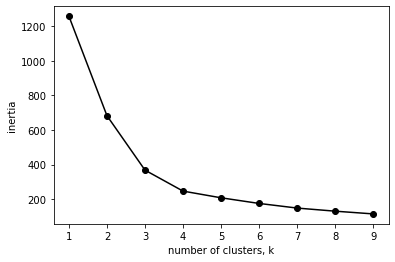

In [94]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
df_cluster['Cluster'] = cluster.labels_
df_cluster

,Local,Ano,Mes,Dia,Precipitacao,UmidadeRelativa,RadiacaoSolar,Cluster
0,Camilopolis,2011,1,1,0.6,6773.500000,29950.000000,3
1,Camilopolis,2011,1,2,0.8,5295.300000,37839.000000,3
2,Camilopolis,2011,1,3,28.0,5349.700000,37733.000000,3
3,Camilopolis,2011,1,4,0.0,4204.800000,35635.000000,3
4,Camilopolis,2011,1,5,65.6,5881.121853,32902.000000,3
...,...,...,...,...,...,...,...,...
15783,Vitoria,2019,12,5,15.2,7431.262495,-4.101408,1
15784,Vitoria,2019,12,6,0.0,6328.326175,0.000000,1
15785,Vitoria,2019,12,7,0.0,4267.626871,12.111713,2
15786,Vitoria,2019,12,8,0.0,3978.211296,3.948405,2


In [28]:
df_cluster.groupby(['Cluster', 'Local'])[['Cluster']].count()

Cluster
Cluster Local               
0       Camilopolis     1201
        Erasmo           425
        Paraiso         1183
        RM              1238
        Vitoria         1132
1       Camilopolis     1068
        Erasmo           946
        Paraiso          939
        RM              1134
        Vitoria          898
2       Camilopolis      150
        Erasmo          1601
        Paraiso          348
        RM               137
        Vitoria          852
3       Camilopolis      755
        Erasmo           105
        Paraiso          712
        RM               673
        Vitoria          291

In [29]:
df_cluster.groupby(['Cluster', 'Mes'])[['Cluster']].count()

Cluster
Cluster Mes         
0       1        478
        2        390
        3        492
        4        451
        5        500
        6        495
        7        412
        8        414
        9        374
        10       383
        11       405
        12       385
1       1        377
        2        405
        3        450
        4        417
        5        364
        6        410
        7        480
        8        519
        9        473
        10       410
        11       367
        12       313
2       1        250
        2        230
        3        232
        4        264
        5        327
        6        267
        7        265
        8        267
        9        263
        10       240
        11       234
        12       249
3       1        270
        2        222
        3        198
        4        194
        5        185
        6        149
        7        163
        8        157
        9        203
        10       243
        11       235
        12       317

In [30]:
fig = px.bar(df_cluster.groupby(['Cluster', 'Local'])[['Mes']].count().reset_index(),
             x="Cluster", y="Mes", color="Local", barmode="group")
fig.show()

In [31]:
fig = px.bar(df_cluster.groupby(['Cluster', 'Local'])[['Mes']].count().reset_index(),
             x="Local", y="Mes", color="Cluster", barmode="group")
fig.show()

In [32]:
cols = [c for c in merged.columns if 'UmidadeRelativa' in c]
merged[cols].corr(method='spearman')

,UmidadeRelativa_0,UmidadeRelativa_1,UmidadeRelativa_2,UmidadeRelativa_3,UmidadeRelativa_4
UmidadeRelativa_0,1.000000,0.493403,0.232698,0.730910,0.111509
UmidadeRelativa_1,0.493403,1.000000,-0.057890,0.539617,-0.228910
UmidadeRelativa_2,0.232698,-0.057890,1.000000,0.206135,0.615032
UmidadeRelativa_3,0.730910,0.539617,0.206135,1.000000,0.024495
UmidadeRelativa_4,0.111509,-0.228910,0.615032,0.024495,1.000000


In [33]:
cols = [c for c in df_ungrouped.columns if 'UmidadeRelativa' in c]
df_ungrouped[cols].corr(method='spearman')

,UmidadeRelativa_0,UmidadeRelativa_1,UmidadeRelativa_2,UmidadeRelativa_3,UmidadeRelativa_4
UmidadeRelativa_0,1.000000,0.507392,0.594872,0.803270,0.407979
UmidadeRelativa_1,0.507392,1.000000,0.261825,0.551175,0.113227
UmidadeRelativa_2,0.594872,0.261825,1.000000,0.643285,0.621256
UmidadeRelativa_3,0.803270,0.551175,0.643285,1.000000,0.424431
UmidadeRelativa_4,0.407979,0.113227,0.621256,0.424431,1.000000


In [34]:
regions[[c for c in regions.columns if 'Data_Hora' not in c]].sum() / regions.shape[0] * 100

UmidadeRelativa_0_error       13.988734
UmidadeRelativa_1_error       33.413759
UmidadeRelativa_2_error       35.274748
UmidadeRelativa_3_error       11.163959
UmidadeRelativa_4_error       40.423288
PressaoAtmosferica_0_error     8.719886
PressaoAtmosferica_1_error    41.133272
PressaoAtmosferica_2_error     7.730720
PressaoAtmosferica_3_error     8.061321
PressaoAtmosferica_4_error     9.679386
TemperaturaDoAr_0_error       10.987946
TemperaturaDoAr_1_error       31.892599
TemperaturaDoAr_2_error       10.396622
TemperaturaDoAr_3_error       10.045915
TemperaturaDoAr_4_error       12.384183
TemperaturaInterna_0_error    14.359218
TemperaturaInterna_1_error    33.880819
TemperaturaInterna_2_error    14.285385
TemperaturaInterna_3_error    13.154486
TemperaturaInterna_4_error    15.376071
PontoDeOrvalho_0_error        14.980866
PontoDeOrvalho_1_error        33.527475
PontoDeOrvalho_2_error        33.066677
PontoDeOrvalho_3_error        11.408201
PontoDeOrvalho_4_error        39.051443


# PCA + KMeans

In [37]:
df_pca = df_grouped.sample(n=100000).copy()
df_pca = df_pca[[c for c in df_pca.columns if c not in ['SensacaoTermica']]].copy().dropna()
df_pca['Mes'] = df_pca['Data_Hora'].dt.month
df_pca['Local'] = df_pca['Local'].rank(method='dense', ascending=False).astype(int)
df_pca = df_pca.drop(columns = ['Data_Hora'])
df_pca

,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,Mes
120605,4,59.500000,929.800000,21.50000,25.300000,13.300000,0.0,99.0,7.500000,0.0,10
265897,1,66.800000,929.000000,16.50000,23.000000,8.900000,0.0,0.0,0.000000,0.0,2
271678,3,90.741791,921.500000,19.90000,21.600000,18.084358,0.0,5.0,2.100000,0.0,4
296848,1,83.900000,923.400000,22.80000,26.800000,20.000000,1.0,87.0,10.800000,0.0,11
176666,1,92.300000,920.200000,20.50000,23.900000,19.200000,0.0,269.0,7.200000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
113832,2,97.800000,933.300000,19.70000,23.300000,19.500000,163.0,139.0,8.600000,0.0,6
296805,4,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,11
56970,5,69.200000,930.600000,16.70000,20.100000,11.100000,278.0,165.0,11.900000,0.0,6
276193,3,71.415459,924.500000,22.80000,26.000000,18.824463,0.0,173.0,3.900000,0.0,8


In [38]:
X_std = StandardScaler().fit_transform(df_pca)

In [39]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x277c597cf10>,
 <a list of 11 Text major ticklabel objects>)

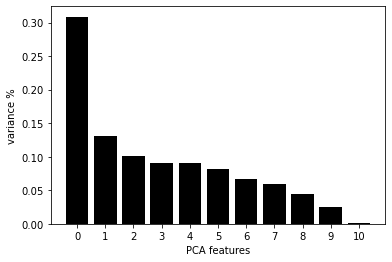

In [40]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [184]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

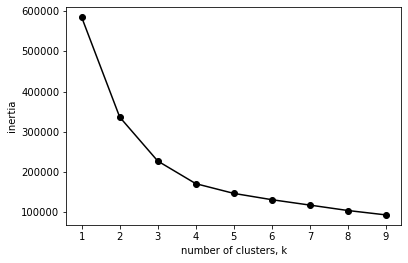

In [42]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# PCA + KMeans (sem aplicar reverse_ohe)

In [62]:
df_pca = df_ungrouped.sample(n=100000).copy()
df_pca = df_pca[[c for c in df_pca.columns if c not in ['index', 'Data', 'Hora', 'SensacaoTermica'] and 'Local' not in c]].copy()#.dropna()
# df_pca['Mes'] = df_pca['Data_Hora'].dt.month
# df_pca['Local'] = df_pca['Local'].rank(method='dense', ascending=False).astype(int)
# df_pca = df_pca.drop(columns = ['Data_Hora'])
for column in df_pca[[c for c in df_pca.columns if 'Data_Hora' not in c]].columns.values:
    df_pca.loc[df_pca[column].isna(), column] = df_pca[column].mean()

df_pca = df_pca.set_index('Data_Hora')
df_pca

,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,VelocidadeDoVento_0,Precipitacao_0,UmidadeRelativa_1,PressaoAtmosferica_1,TemperaturaDoAr_1,TemperaturaInterna_1,PontoDeOrvalho_1,SensacaoTermica_1,RadiacaoSolar_1,DirecaoDoVento_1,VelocidadeDoVento_1,Precipitacao_1,UmidadeRelativa_2,PressaoAtmosferica_2,TemperaturaDoAr_2,TemperaturaInterna_2,PontoDeOrvalho_2,SensacaoTermica_2,RadiacaoSolar_2,DirecaoDoVento_2,VelocidadeDoVento_2,Precipitacao_2,UmidadeRelativa_3,PressaoAtmosferica_3,TemperaturaDoAr_3,TemperaturaInterna_3,PontoDeOrvalho_3,SensacaoTermica_3,RadiacaoSolar_3,DirecaoDoVento_3,VelocidadeDoVento_3,Precipitacao_3,UmidadeRelativa_4,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4
Data_Hora,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-11-14 11:45:00,83.6,925.7,17.500000,19.800000,14.7,17.500000,0.0,294.0,10.1,0.0,80.7,927.0,17.9,20.5,14.5,0.0,0.0,53.0,13.4,0.000000,95.203400,925.900000,17.400000,18.700000,17.120337,14.400000,0.000000,46.000000,14.400000,0.0,98.200000,933.7,16.9,21.0,16.8,17.100000,0.000000,266.0,1.4,0.0,91.154625,927.500000,17.900000,23.041742,16.450169,17.900000,0.0,2.000000,8.300000,0.0
2017-08-21 14:00:00,91.4,922.3,18.500000,21.000000,17.0,17.964929,0.0,5.0,5.8,0.0,90.7,0.0,18.5,21.3,16.9,0.0,0.0,0.0,0.0,0.600000,103.007896,922.432922,18.361057,19.333063,19.024376,18.036888,0.089701,122.019218,10.964128,0.2,96.200000,930.1,19.1,22.8,18.7,18.549916,0.000000,95.0,3.2,0.0,0.000000,923.800000,18.500000,21.910213,0.000000,8.217346,0.0,80.000000,6.500000,0.2
2014-09-12 09:15:00,88.2,927.1,14.532153,17.046131,12.4,17.964929,3.0,57.0,11.2,0.0,87.5,926.9,14.6,18.7,12.5,0.0,4.0,347.0,9.0,0.000000,90.400000,925.300000,14.400000,18.600000,12.900000,18.036888,2.000000,51.000000,9.400000,0.0,84.700000,933.2,15.0,18.5,12.6,18.549916,3.000000,66.0,5.0,0.0,84.300000,926.900000,14.600000,18.000000,11.900000,8.217346,4.0,0.000000,0.000000,0.0
2018-12-09 09:30:00,71.9,920.9,22.200000,25.900000,17.0,19.100000,119.0,269.0,22.3,0.0,64.7,922.2,23.2,27.0,16.2,0.0,0.0,346.0,12.8,0.000000,72.053223,921.100000,22.900000,26.600000,17.782650,20.700000,86.000000,26.000000,14.400000,0.0,69.922272,928.6,23.0,28.6,18.5,23.300000,102.000000,40.0,7.9,0.0,70.251648,922.500000,23.400000,30.200000,17.338696,22.500000,0.0,323.000000,18.000000,0.0
2019-09-27 18:15:00,50.3,928.1,14.100000,16.400000,3.9,14.100000,0.0,24.0,6.1,0.0,61.6,929.6,12.5,14.9,5.4,0.0,0.0,106.0,3.7,0.169706,51.100000,928.400000,13.600000,14.200000,3.600000,12.500000,0.000000,163.000000,9.000000,0.0,52.400000,936.2,13.4,17.3,4.1,13.600000,0.000000,80.0,1.1,0.4,56.400000,929.800000,13.600000,16.412216,5.000000,13.327952,0.0,103.402855,3.914019,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-11-10 13:15:00,55.4,923.5,24.600000,28.200000,15.0,17.964929,108.0,317.0,1.8,0.0,49.5,923.5,24.3,28.3,12.9,0.0,113.0,329.0,17.6,0.000000,56.700000,921.900000,24.400000,28.700000,15.100000,18.036888,152.000000,33.000000,12.600000,0.0,50.200000,929.4,24.5,29.4,13.8,18.549916,154.000000,320.0,13.0,0.0,53.700000,923.400000,24.600000,28.900000,14.600000,8.217346,110.0,342.000000,5.800000,0.0
2014-10-12 12:00:00,70.0,923.8,23.500000,25.800000,17.7,17.964929,205.0,78.0,3.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,71.500000,922.100000,22.900000,28.500000,17.400000,18.036888,233.000000,48.000000,17.600000,0.0,69.400000,929.7,23.1,26.7,17.6,18.549916,231.000000,80.0,7.9,0.0,66.200000,923.700000,23.900000,27.100000,17.600000,8.217346,201.0,324.000000,14.000000,0.4
2019-10-04 22:30:00,88.2,933.3,14.800000,17.700000,12.8,17.964929,0.0,178.0,12.2,0.0,86.9,0.0,14.4,17.2,12.3,0.0,0.0,0.0,0.0,0.200000,104.000000,931

In [63]:
X_std = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x2782c9cc2b0>,
 <a list of 20 Text major ticklabel objects>)

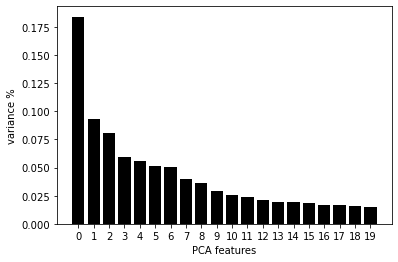

In [64]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [183]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

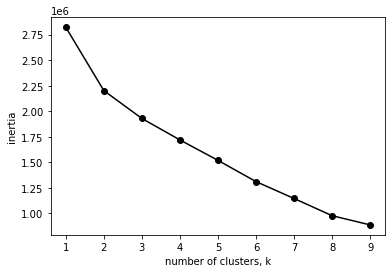

In [67]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:7])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Testando clusterização com apenas a precipitação
Objetivo: Forçar a distinção de "tipos de chuva" para detectar chuvas mais fortes

Testando clusterizações com a precipitação e outras features, independente da feature selecionada, a precipitação não tem influência suficiente e a clusterização acaba sendo realizada em função das outras features, completamente ignorando a tendência da precipitação.

In [164]:
#df_prec = df_grouped[df_grouped['Precipitacao'] > 0]
df_prec = df_grouped.copy()
df_prec['Ano'] = df_prec['Data_Hora'].dt.year
df_prec['Mes'] = df_prec['Data_Hora'].dt.month
df_prec['Dia'] = df_prec['Data_Hora'].dt.day
df_prec = df_prec.drop(columns = ['Data_Hora'])
s_prec = df_prec.groupby(['Local', 'Ano', 'Mes', 'Dia']).sum().reset_index()['Precipitacao']
df_prec = df_prec.groupby(['Local', 'Ano', 'Mes', 'Dia']).mean().reset_index()
df_prec['Precipitacao'] = s_prec
df_prec = df_prec[[c for c in df_prec.columns if c not in ['SensacaoTermica']]].copy().dropna()
df_prec['Local'] = df_prec['Local'].rank(method='dense', ascending=False).astype(int)
df_prec

,Local,Ano,Mes,Dia,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
0,5,2011,1,1,70.557292,908.655208,21.895833,25.395833,16.353125,311.979167,127.010417,6.300000,0.6
1,5,2011,1,2,55.159375,924.290625,24.882292,28.112500,14.110213,394.156250,264.333333,5.547929,0.8
2,5,2011,1,3,55.726042,924.098958,24.204167,27.277083,12.391667,393.052083,184.875000,8.540625,28.0
3,5,2011,1,4,43.800000,914.808333,25.389583,28.837500,9.919530,371.197917,251.614583,6.456247,0.0
4,5,2011,1,5,62.565126,925.509574,20.634043,23.960638,11.056894,350.021277,166.989362,5.041446,65.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15784,1,2019,12,5,77.408984,924.483333,20.321356,24.878947,15.693702,-0.042723,212.309571,7.228867,15.2
15785,1,2019,12,6,65.920064,922.778125,20.200083,24.935573,13.525387,0.000000,189.388836,3.975417,0.0
15786,1,2019,12,7,44.454447,927.385417,16.074839,19.650945,9.811256,0.126164,113.550180,6.706997,0.0
15787,1,2019,12,8,41.439701,928.351042,16.087180,19.727405,9.581108,0.041129,106.425289,5.894426,0.0


In [165]:
sc = MinMaxScaler(feature_range=(0,1))
df_norm = sc.fit_transform(df_prec[['Precipitacao']])
df_norm

array([[0.00025202],
       [0.00033602],
       [0.01176075],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

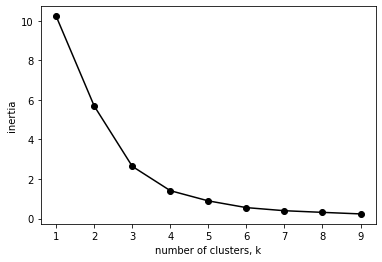

In [166]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [177]:
cluster = KMeans(n_clusters=4, random_state=42).fit(df_norm)
df_prec['Cluster'] = cluster.labels_

In [178]:
fig = px.bar(df_prec.groupby(['Cluster', 'Local'])[['Mes']].count().reset_index(),
             x="Cluster", y="Mes", color="Local", barmode="group")
fig.show()

In [182]:
df_prec.groupby('Cluster').min()

,Local,Ano,Mes,Dia,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
Cluster,,,,,,,,,,,,,
0,1,2011,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,-12.969719,0.000000,0.0000,0.0
1,1,2011,1,1,5.355248,96.190156,2.666105,2.977190,1.507663,0.000000,24.024391,0.1125,305.6
2,3,2013,9,1,2.590625,0.000000,0.535417,0.629167,0.441667,0.000000,0.000000,0.0000,1299.6
3,1,2011,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,-1.218240,0.000000,0.0000,60.8


In [180]:
fig = px.bar(df_prec.groupby(['Cluster'])[['Precipitacao']].mean().reset_index(),
             x="Cluster", y="Precipitacao", barmode="group")
fig.show()

In [181]:
df_prec.groupby('Cluster').count()

,Local,Ano,Mes,Dia,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
Cluster,,,,,,,,,,,,,
0,14584,14584,14584,14584,14584,14584,14584,14584,14584,14584,14584,14584,14584
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,6,6,6,6,6,6,6,6,6,6,6,6,6
3,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139
